In [1]:
# !curl -O https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc
# !curl -O https://zenodo.org/record/3755721/files/FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_V.nc
# !curl -O https://zenodo.org/record/3755721/files/mesh_mask.nc
# !curl -O https://zenodo.org/record/3755721/files/new_maskglo.nc

In [2]:
import xarray as xr
import numpy as np

In [3]:
ds_T = xr.open_dataset(
    "FOCI1.14-TEST.2020.04.1_1m_20110101_20111231_grid_T.nc", 
    chunks={"time_counter": 1, "x": 100, "y": 100},
)
ds_T = ds_T.isel(time_counter=0, drop=True)
ds_T = ds_T.rename({"deptht": "z"})
ds_T = ds_T.compute()
ds_T = ds_T.assign_coords(x=np.arange(ds_T.dims["x"]), y=np.arange(ds_T.dims["y"]))
ds_T

<xarray.Dataset>
Dimensions:               (y: 511, x: 722, z: 46, axis_nbounds: 2)
Coordinates:
    nav_lat               (y, x) float32 -77.01 -77.01 -77.01 ... 50.0 50.0
    nav_lon               (y, x) float32 72.75 73.25 73.75 ... 73.01 73.0 73.0
  * z                     (z) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
  * x                     (x) int64 0 1 2 3 4 5 6 ... 716 717 718 719 720 721
  * y                     (y) int64 0 1 2 3 4 5 6 ... 505 506 507 508 509 510
Dimensions without coordinates: axis_nbounds
Data variables: (12/17)
    deptht_bounds         (z, axis_nbounds) float32 0.0 6.194 ... 5.75e+03 6e+03
    votemper              (z, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    time_centered_bounds  (axis_nbounds) datetime64[ns] 2011-01-01 2011-02-01
    time_counter_bounds   (axis_nbounds) datetime64[ns] 2011-01-01 2011-02-01
    vosaline              (z, y, x) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sosstsst              (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    somxl010              (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    somixhgt              (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sowindsp              (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    sohefldp              (y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sowafldp              (y, x) float32 nan nan nan nan nan ... nan nan nan nan
    sobowlin              (y, x) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    name:         FOCI1.14-JH024_1m_20110101_20111231
    description:  ocean T grid variables
    title:        ocean T grid variables
    Conventions:  CF-1.5
    production:   An IPSL model
    timeStamp:    2019-Apr-17 18:02:10 CEST
    history:      Wed Apr 17 18:47:54 2019: ncks -7 -a -L 1 --cnk_dmn time,1 ...
    NCO:          4.4.8

In [4]:
pot_temp = ds_T.votemper
salinity = ds_T.vosaline

In [5]:
ds_m = xr.open_dataset("mesh_mask.nc").squeeze(drop=True)
ds_m = ds_m.assign_coords(x=np.arange(ds_m.dims["x"]), y=np.arange(ds_m.dims["y"]))
ds_m

<xarray.Dataset>
Dimensions:       (y: 511, x: 722, z: 46)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 7 ... 714 715 716 717 718 719 720 721
  * y             (y) int64 0 1 2 3 4 5 6 7 ... 503 504 505 506 507 508 509 510
Dimensions without coordinates: z
Data variables: (12/44)
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
    nav_lev       (z) float32 ...
    time_counter  float64 ...
    tmask         (z, y, x) int8 ...
    umask         (z, y, x) int8 ...
    ...            ...
    gdepv         (z, y, x) float32 ...
    gdepw_0       (z, y, x) float32 ...
    gdept_1d      (z) float64 ...
    gdepw_1d      (z) float64 ...
    e3t_1d        (z) float64 ...
    e3w_1d        (z) float64 ...

In [6]:
ds_mask = xr.open_dataset("new_maskglo.nc").squeeze(drop=True)
ds_mask = ds_mask.rename({"X": "x", "Y": "y"})
ds_mask = ds_mask.assign_coords(x=np.arange(ds_mask.dims["x"]), y=np.arange(ds_mask.dims["y"]))
ds_mask

<xarray.Dataset>
Dimensions:   (x: 722, y: 511)
Coordinates:
  * x         (x) int64 0 1 2 3 4 5 6 7 8 ... 714 715 716 717 718 719 720 721
  * y         (y) int64 0 1 2 3 4 5 6 7 8 ... 503 504 505 506 507 508 509 510
Data variables:
    NAV_LON   (y, x) float32 ...
    NAV_LAT   (y, x) float32 ...
    tmaskatl  (y, x) float64 ...
    nav_lat   (y, x) float32 ...
    nav_lon   (y, x) float32 ...
    tmaskind  (y, x) float32 ...
    tmaskpac  (y, x) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.4 (http://code.zmaw.de/p...
    Conventions:  CF-1.0
    history:      Tue May 16 15:48:27 2017: cdo -merge new_maskglo_nest.nc ne...
    CDO:          Climate Data Operators version 1.6.4 (http://code.zmaw.de/p...

In [7]:
pot_temp = pot_temp.where((ds_m.tmask == 1) & (ds_m.tmaskutil == 1))
salinity = salinity.where((ds_m.tmask == 1) & (ds_m.tmaskutil == 1))

In [8]:
import gsw

In [9]:
ct = gsw.CT_from_pt(salinity, pot_temp)

In [10]:
from matplotlib import pyplot as plt

In [11]:
rho = gsw.rho(salinity, ct, ds_T.z).rename("dens")

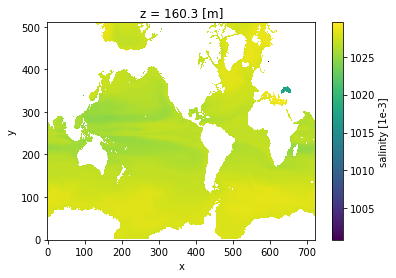

In [12]:
rho.isel(z=12).plot()

In [13]:
drho_dx = (rho.diff("x") / ds_m.e1t).rename("drho_dx")

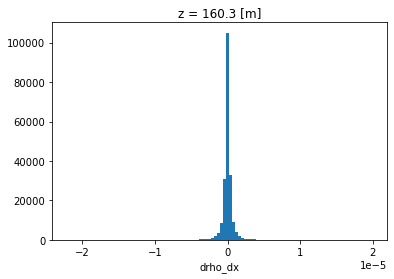

In [14]:
drho_dx.isel(z=12).plot.hist(bins=100);

In [15]:
f = 2 * 7.2921e-5 * np.sin(np.deg2rad(ds_m.gphit))
f = f.where(abs(ds_m.gphit) > 5)
g = 9.81

In [16]:
dv_dz = - g / f / rho * drho_dx

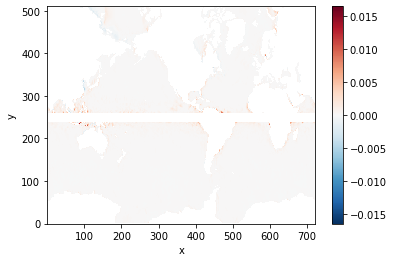

In [17]:
dv_dz.max("z").plot()

In [18]:
v = (dv_dz * ds_m.e3t_0).isel(z=slice(None, None, -1)).cumsum("z").isel(z=slice(None, None, -1))
v = v.where(~dv_dz.isnull())
v

<xarray.DataArray (y: 511, x: 721, z: 46)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
  * x        (x) int64 1 2 3 4 5 6 7 8 9 ... 713 714 715 716 717 718 719 720 721
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 502 503 504 505 506 507 508 509 510
  * z        (z) float32 3.047 9.454 16.36 ... 5.375e+03 5.625e+03 5.875e+03
    nav_lat  (y, x) float32 -77.01 -77.01 -77.01 -77.01 ... 50.07 50.0 50.0
    nav_lon  (y, x) float32 73.25 73.75 74.25 74.75 ... 73.02 73.01 73.0 73.0

In [19]:
# %pip install cmocean

In [20]:
import cmocean

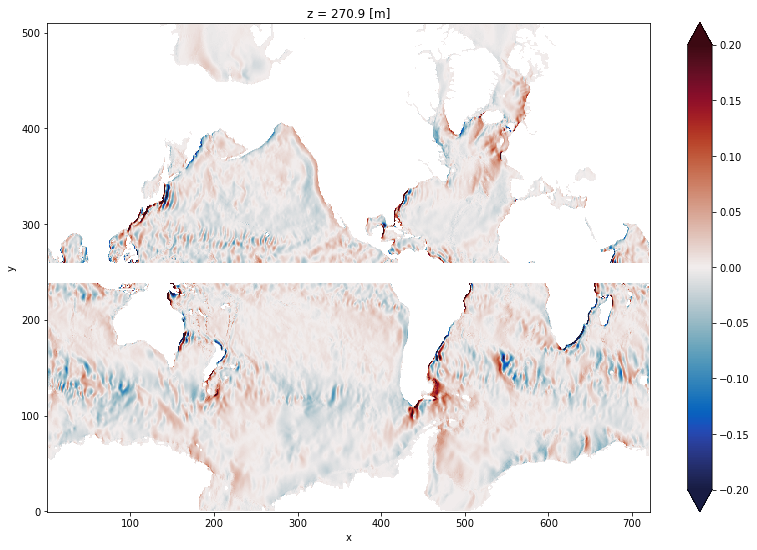

In [21]:
v.sel(z=250, method="nearest").plot(size=9, vmin=-0.2, vmax=0.2, cmap=cmocean.cm.balance)

In [22]:
amoc = (v.where(ds_mask.tmaskatl == 1) * ds_m.e1t * ds_m.e3t_0).sum("x").isel(z=slice(None, None, -1)).cumsum("z").isel(z=slice(None, None, -1))
amoc

<xarray.DataArray (y: 511, z: 46)>
array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.75245506e+03, -4.36190053e+03, -1.12433568e+03, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.90504441e+04, -1.57391929e+04, -1.19761670e+04, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-5.92062950e+06, -5.80600584e+06, -5.67612901e+06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-6.45230542e+06, -6.33757555e+06, -6.20554539e+06, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])
Coordinates:
  * y        (y) int64 0 1 2 3 4 5 6 7 8 ... 502 503 504 505 506 507 508 509 510
  * z        (z) float32 3.047 9.454 16.36 ... 5.375e+03 5.625e+03 5.875e+03

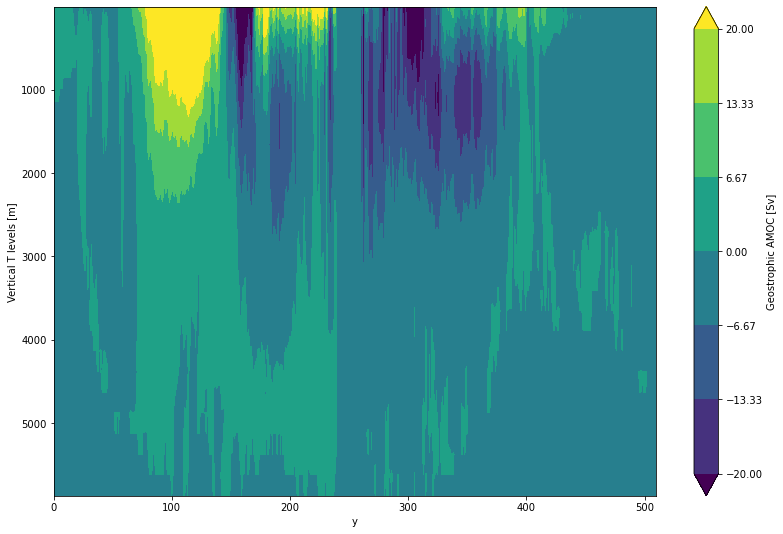

In [23]:
(amoc / 1e6).rename("Geostrophic AMOC [Sv]").T.plot.contourf(vmin=-20, vmax=20, size=9)
plt.gca().invert_yaxis()